<a href="https://colab.research.google.com/github/groupsvkg/ai/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tensors

In [ ]:
import torch
import numpy as np

# Data to tensor and numpy array
data        = [[1,2], 
               [3,4]]
tensor_data = torch.tensor(data)
numpy_data  = np.array(data)

print(f"data:\n{data}")
print(f"tensor_data:\n{tensor_data}")
print(f"numpy_data:\n{numpy_data}")

# Matrix with Random number
print(torch.rand(2,3))
# Columnwise multiplication
print(tensor_data.mul(tensor_data))
# Matrix multiplication
print(tensor_data.matmul(tensor_data))
# Transpose
print(tensor_data.T)

# Generate Matrix with ones
print(torch.ones(3,4))
print(torch.ones_like(tensor_data))


data:
[[1, 2], [3, 4]]
tensor_data:
tensor([[1, 2],
        [3, 4]])
numpy_data:
[[1 2]
 [3 4]]
tensor([[0.2965, 0.1349, 0.6140],
        [0.8850, 0.4606, 0.0229]])
tensor([[ 1,  4],
        [ 9, 16]])
tensor([[ 7, 10],
        [15, 22]])
tensor([[1, 3],
        [2, 4]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[1, 1],
        [1, 1]])


## Autograd

In [ ]:
import torch, torchvision
import matplotlib.pyplot as plt

model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

# Prediction
prediction = model(data)

# Loss
loss = (prediction - labels).sum()
loss.backward()

# Optimization
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
optim.step()


## Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 3)
    self.conv2 = nn.Conv2d(6, 16, 3)
    self.fc1 = nn.Linear(16*6*6, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
      size = x.size()[1:]
      num_features = 1
      for s in size:
          num_features *= s
      return num_features

net = Net()
print(net)

params = list(net.parameters())
print(len(params))
print(params[0].size())

input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

net.zero_grad()
out.backward(torch.randn(1, 10))

output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

print("---------------------")
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)


import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update


Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
10
torch.Size([6, 1, 3, 3])
tensor([[-0.0444, -0.0343, -0.0087,  0.0301, -0.0976, -0.0592,  0.0426,  0.0169,
          0.0606, -0.0449]], grad_fn=<AddmmBackward>)
tensor(1.1742, grad_fn=<MseLossBackward>)
---------------------
conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0086, -0.0095, -0.0136,  0.0100, -0.0246, -0.0164])


TRAINING A CLASSIFIER

Files already downloaded and verified
Files already downloaded and verified
torch.Size([4, 3, 32, 32])


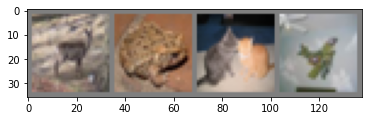

 deer  frog   cat plane


In [8]:
import torch
import torchvision
import torchvision.transforms as transforms

# Loading and normalizing CIFAR10

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [7]:
# Define a Convolutional Neural Network

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [9]:
# Define a Loss function and optimizer

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
# Train the network

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')



[1,  2000] loss: 2.173
[1,  4000] loss: 1.826
[1,  6000] loss: 1.673
[1,  8000] loss: 1.589
[1, 10000] loss: 1.535
[1, 12000] loss: 1.470
[2,  2000] loss: 1.415
[2,  4000] loss: 1.364
[2,  6000] loss: 1.375
[2,  8000] loss: 1.342
[2, 10000] loss: 1.304
[2, 12000] loss: 1.293
Finished Training


In [11]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

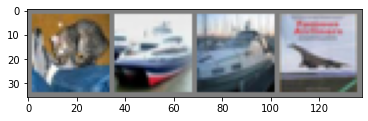

GroundTruth:    cat  ship  ship plane


In [12]:
# Test the network on the test data

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [14]:
net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)
print(outputs)
_, predicted = torch.max(outputs, 1)

print(predicted)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))



tensor([[-1.3505, -1.1097,  0.7351,  3.1946, -2.2610,  1.2826,  0.8464, -1.4501,
         -0.0724, -0.5203],
        [ 4.9793,  6.9395, -2.5537, -4.6846, -1.5423, -5.4477, -5.8723, -4.1005,
          3.5175,  5.3419],
        [ 2.7518,  4.7406, -1.3853, -2.6505, -1.5213, -3.5930, -3.8136, -2.8223,
          3.0106,  3.3748],
        [ 4.4948,  2.1839, -0.8318, -2.8800, -0.4122, -4.3979, -4.6242, -3.1255,
          5.3432,  2.1061]], grad_fn=<AddmmBackward>)
tensor([3, 1, 1, 8])
Predicted:    cat   car   car  ship


In [17]:
# Performance
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [18]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 55 %
Accuracy of   car : 70 %
Accuracy of  bird : 33 %
Accuracy of   cat : 48 %
Accuracy of  deer : 34 %
Accuracy of   dog : 36 %
Accuracy of  frog : 74 %
Accuracy of horse : 69 %
Accuracy of  ship : 56 %
Accuracy of truck : 73 %


In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu
